 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_path)
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df.head()

C:\Users\daniy\AppData\Local\Temp\ipykernel_11832\1549865114.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isnull().mean()*100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().mean()*100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_path)
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)
algo_returns_df.head()

C:\Users\daniy\AppData\Local\Temp\ipykernel_11832\629810476.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().mean()*100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().mean()*100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path('Resources/sp500_history.csv')
sp500_history_df = pd.read_csv(sp500_history_path)
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.drop(columns=['Date'], inplace=True)
sp500_history_df.head()

C:\Users\daniy\AppData\Local\Temp\ipykernel_11832\3796777733.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
C:\Users\daniy\AppData\Local\Temp\ipykernel_11832\3796777733.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace("$", "")
sp500_history_df['Close'] = sp500_history_df['Close'].astype("float")

In [12]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
daily_returns_sp500 = daily_returns_sp500.dropna()
daily_returns_sp500.isnull().mean()*100
daily_returns_sp500.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500.rename(columns={'Close': 'S&P TSX'}, inplace=True)
daily_returns_sp500.head()

,S&P TSX
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_cols = pd.concat([whale_returns_df, algo_returns_df, daily_returns_sp500], axis="columns", join="inner")
joined_data_cols

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

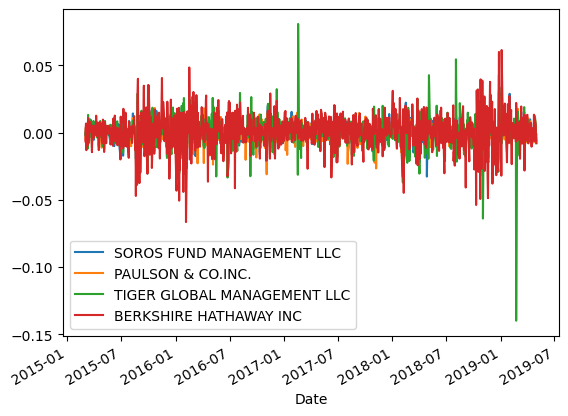

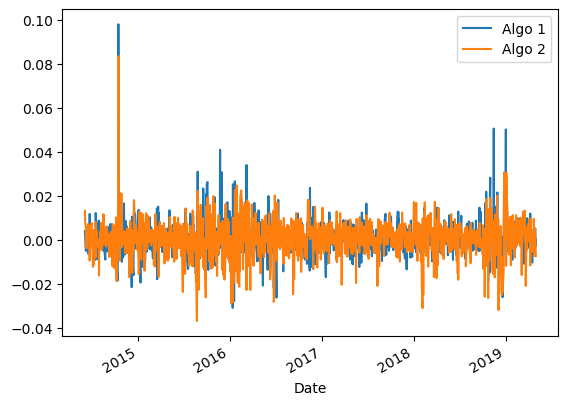

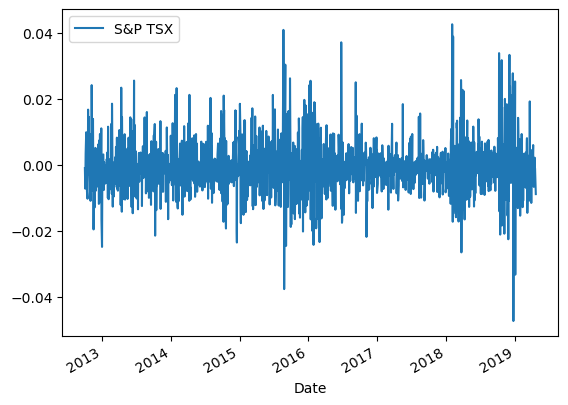

In [16]:
# Plot daily returns of all portfolios

whale_returns_df.plot()

algo_returns_df.plot()

daily_returns_sp500.plot()


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

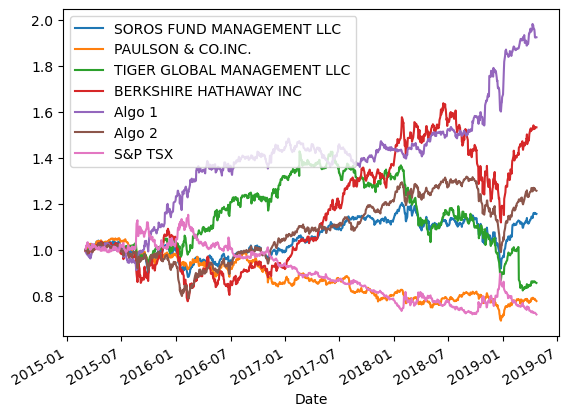

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_cols).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

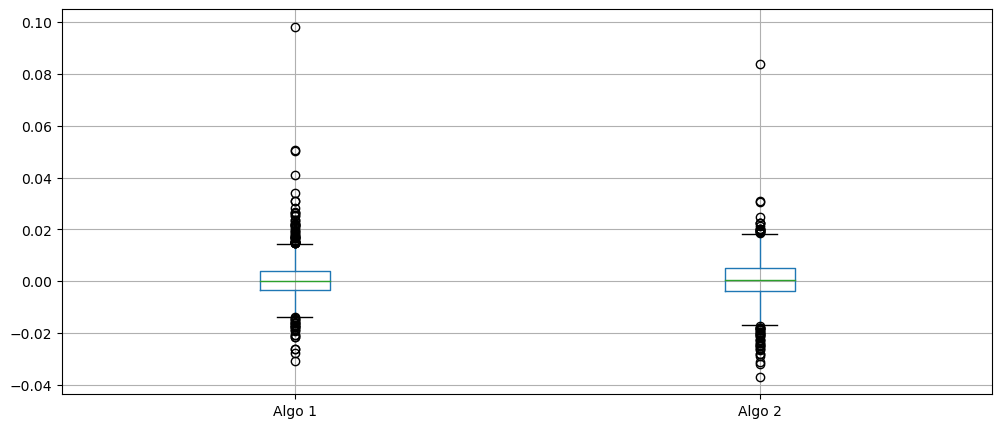

In [18]:
# Box plot to visually show risk

algo_returns_df.boxplot(figsize=(12,5))

<Axes: >

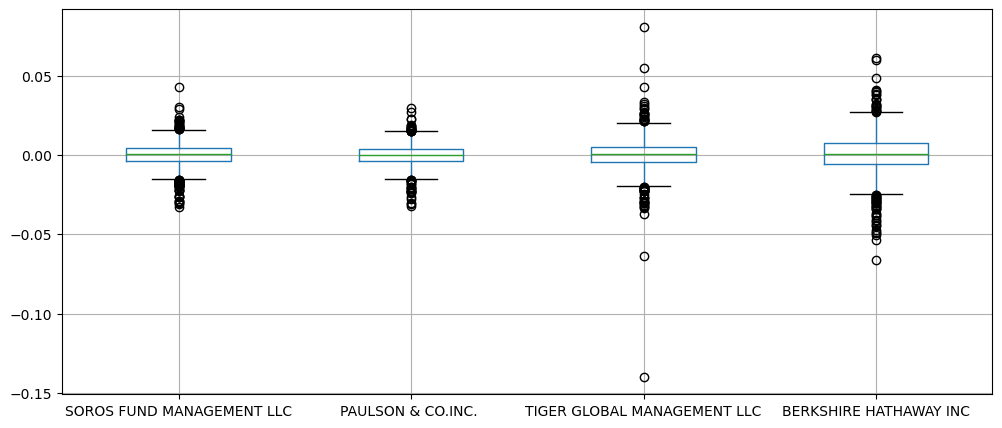

In [19]:
whale_returns_df.boxplot(figsize=(12,5))

<Axes: >

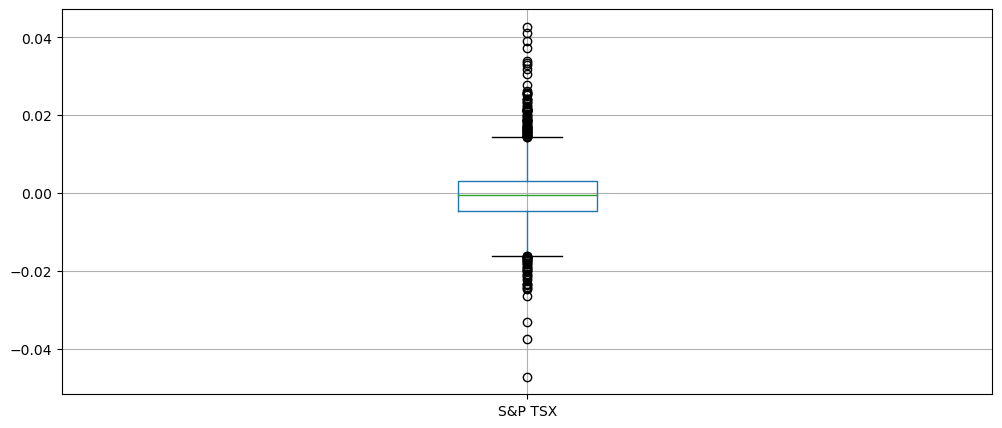

In [20]:
daily_returns_sp500.boxplot(figsize=(12,5))

<Axes: >

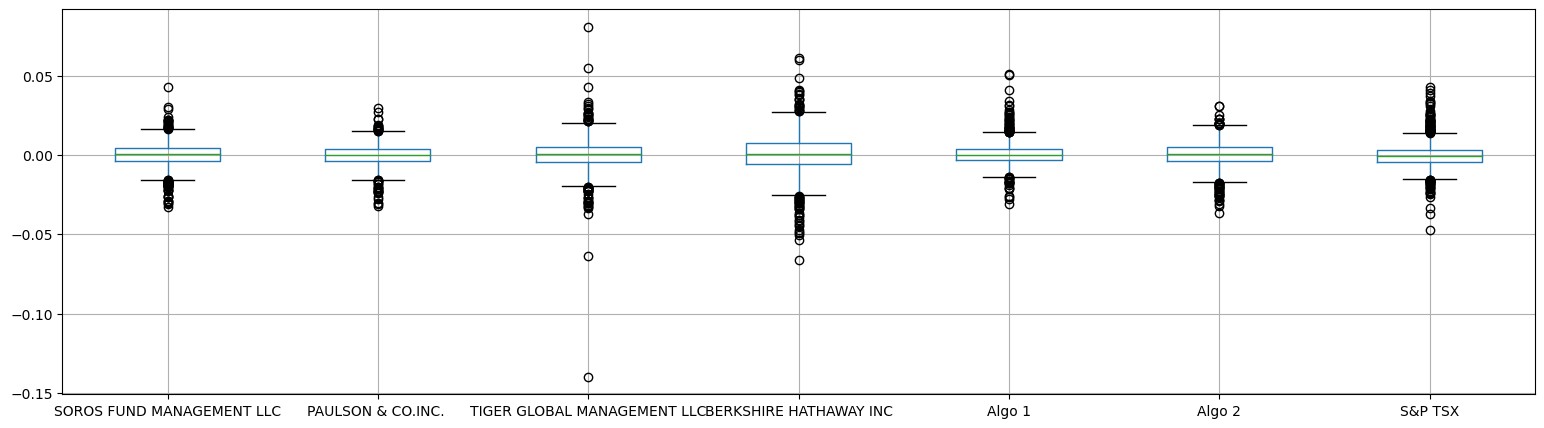

In [21]:
joined_data_cols.boxplot(figsize=(19,5))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
standard_deviation_all = joined_data_cols.std()
print("Standard deviations of all portfolios are showed below:")
print(standard_deviation_all)

Standard deviations of all portfolios are showed below:
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P TSX                        0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
standard_deviation_sp500 = daily_returns_sp500.std()
print("Standard deviation of the S&P500 Returns Portfolio is showed below:")
print(standard_deviation_sp500)
# Determine which portfolios are riskier than the S&P 500
##To determine which portfolio is riskier than the S&P 500 Returns Portfolio, we should compare the standard deviations of all the given portfolios. 
##The portfolio with a higher standard deviation is considered riskier because it has greater volatility and a larger range of potential returns.
##Therefore, according to calculation in line 165, I can say that the Whale Returns Portfolio is riskier than S&P500 Returns Portfolio, because it has 0.012919 and 0.010897 deviations.

Standard deviation of the S&P500 Returns Portfolio is showed below:
S&P TSX    0.008135
dtype: float64


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
trading_days_per_year = 252
annualized_std_all = standard_deviation_all * np.sqrt(trading_days_per_year)
print("Annualized Standard Deviation of all the portfolios is showed below:")
print(annualized_std_all)

Annualized Standard Deviation of all the portfolios is showed below:
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P TSX                        0.136313
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

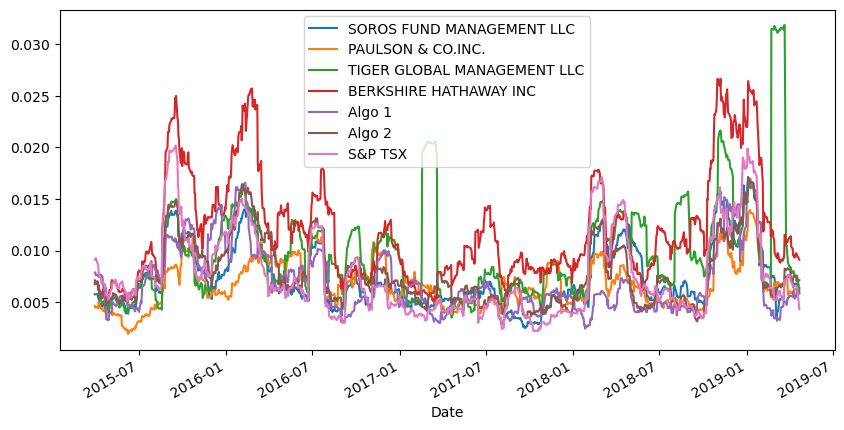

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_all = joined_data_cols.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_all.plot(figsize=(10,5))

### Calculate and plot the correlation

<Axes: >

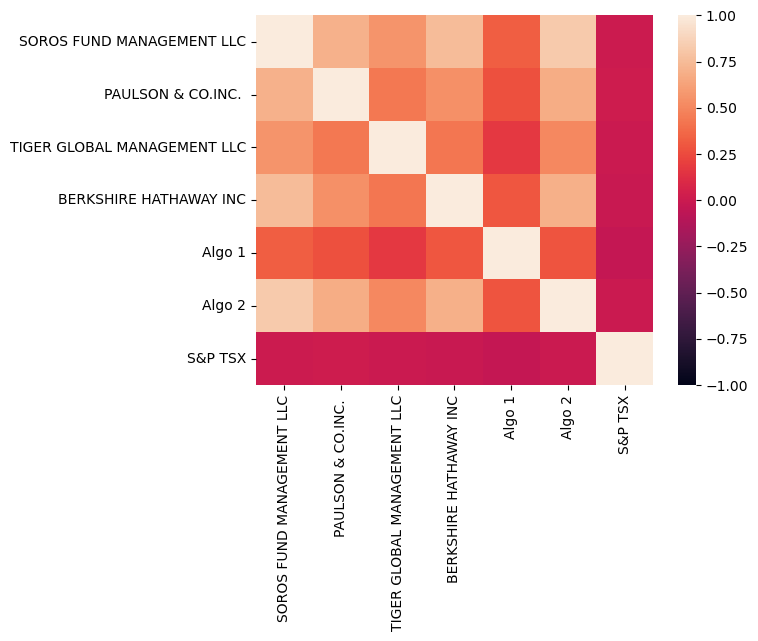

In [26]:
# Calculate the correlation
correlation_df = joined_data_cols.corr()
# Display de correlation matrix
sns.heatmap(correlation_df, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Covariance of an Algorithmic Returns Portfolio equals
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000005
2019-04-16   -0.000004
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000004
Length: 1042, dtype: float64

Covariance of S&P500 Returns Portfolio equals
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P TSX, Length: 1042, dtype: float64

Beta of Algorithmic Returns Portfolio equals
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.116546
2019-04-16   -0.102774
2019-04-17   -0.101901
2019-04-18   -0.103039
2019-04-22   -0.113498
Length

<Axes: title={'center': 'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

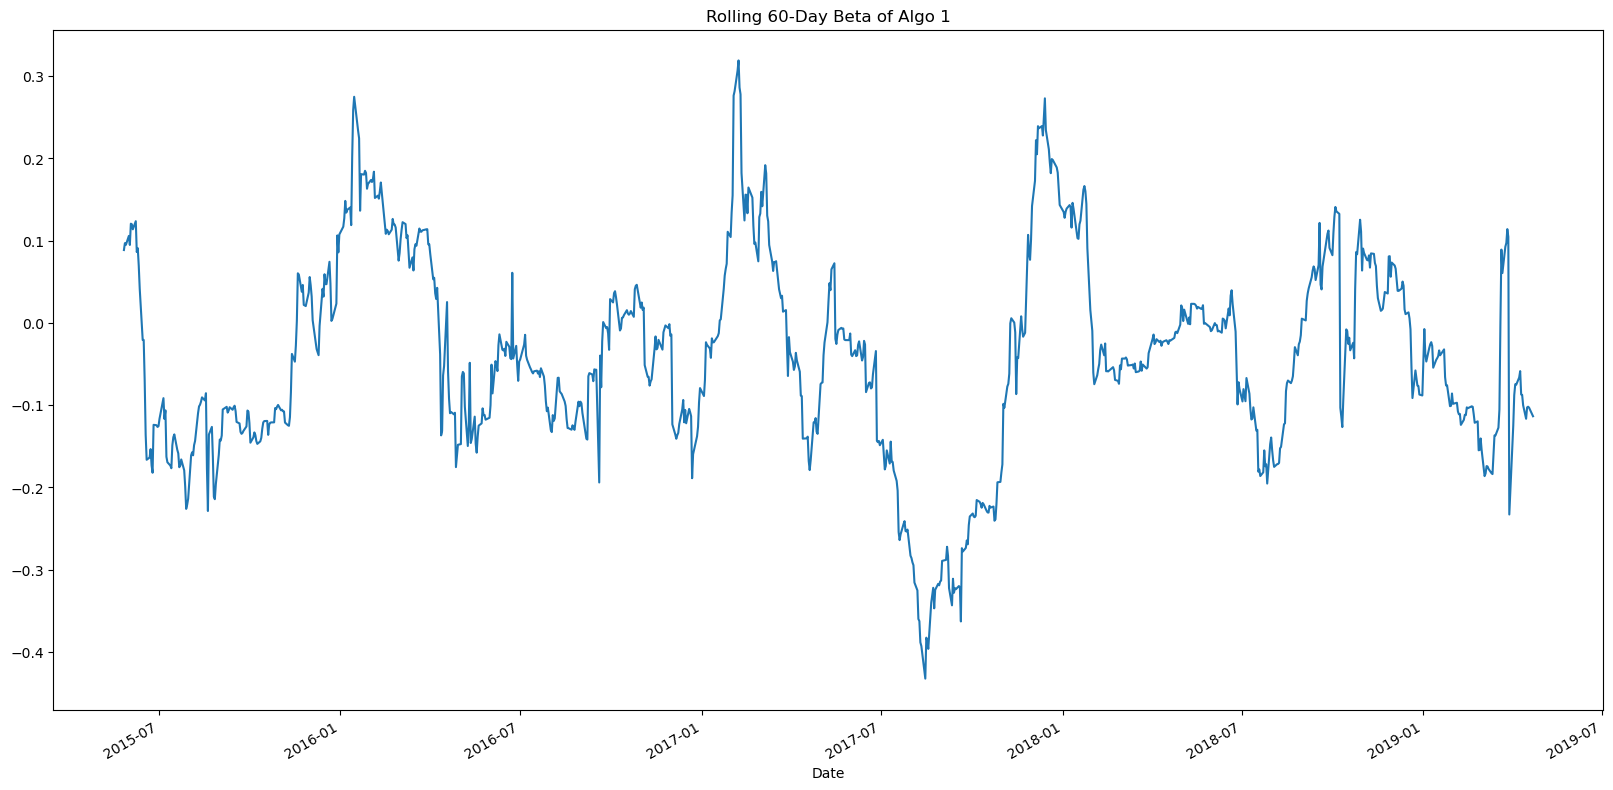

In [27]:
# Calculate covariance of a single portfolio
covariance_algo = joined_data_cols['Algo 1'].rolling(window=60).cov(joined_data_cols['S&P TSX'])
print("Covariance of an Algorithmic Returns Portfolio equals")
print(covariance_algo)
print()

# Calculate variance of S&P 500
variance_sp500 = joined_data_cols['S&P TSX'].rolling(window=60).var()
print("Covariance of S&P500 Returns Portfolio equals")
print(variance_sp500)
print()

# Computing beta
algo_beta = covariance_algo / variance_sp500
print("Beta of Algorithmic Returns Portfolio equals")
print(algo_beta)

# Plot beta trend
algo_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [28]:
# Use `ewm` to calculate the rolling window
rolling_window_size = 21
ewm = joined_data_cols.ewm(span=rolling_window_size).std()
print(ewm)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                   0.002472            0.005814   
2015-03-05                   0.002658            0.004896   
2015-03-06                   0.005515            0.004592   
2015-03-09                   0.004716            0.004434   
...                               ...                 ...   
2019-04-15                   0.005817            0.005879   
2019-04-16                   0.005551            0.005606   
2019-04-17                   0.005487            0.005727   
2019-04-18                   0.005232            0.005475   
2019-04-22                   0.005136            0.005650   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_data_cols.mean() * 252) / (joined_data_cols.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P TSX                       -0.518582
dtype: float64

<Axes: >

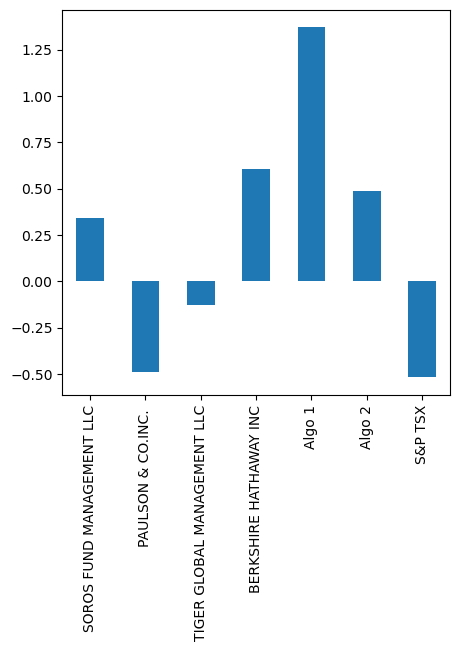

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(5,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [31]:
#According to Investopedia (https://www.investopedia.com/ask/answers/010815/what-good-sharpe-ratio.asp)
#Usually, any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. 
#A ratio higher than 2.0 is rated as very good.
#A ratio of 3.0 or higher is considered excellent.
#A ratio under 1.0 is considered sub-optimal.

#As we can see in my visualization of the sharpe ratios:
#Algorithmic Returns Portfolio has acceptable to good Sharpe Ratio which is shown in Algo 1 (1.369589), while S&P 500 and the whales portfolios are considered as sub-optimal ones. 
#Therefore, algorithmic strategies do outperform both the market (S&P 500) and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Reading data from 1st stock
aapl_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path)
aapl_df.set_index(pd.to_datetime(aapl_df['Trade DATE'], infer_datetime_format=True), inplace=True)
aapl_df.drop(columns=['Trade DATE'], inplace=True)
aapl_df.drop(columns=['Symbol'], inplace=True)
aapl_df = aapl_df.rename(columns={'NOCP': 'AAPL'})
aapl_df.head()

C:\Users\daniy\AppData\Local\Temp\ipykernel_11832\3482287198.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df.set_index(pd.to_datetime(aapl_df['Trade DATE'], infer_datetime_format=True), inplace=True)


,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [33]:
# Reading data from 2nd stock
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path)
cost_df.set_index(pd.to_datetime(cost_df['Trade DATE'], infer_datetime_format=True), inplace=True)
cost_df.drop(columns=['Trade DATE'], inplace=True)
cost_df.drop(columns=['Symbol'], inplace=True)
cost_df = cost_df.rename(columns={'NOCP': 'COST'})
cost_df.head()

C:\Users\daniy\AppData\Local\Temp\ipykernel_11832\2995134259.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df.set_index(pd.to_datetime(cost_df['Trade DATE'], infer_datetime_format=True), inplace=True)


,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [34]:
# Reading data from 3rd stock
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path)
goog_df.set_index(pd.to_datetime(goog_df['Trade DATE'], infer_datetime_format=True), inplace=True)
goog_df.drop(columns=['Trade DATE'], inplace=True)
goog_df.drop(columns=['Symbol'], inplace=True)
goog_df = goog_df.rename(columns={'NOCP': 'GOOG'})
goog_df.head()

C:\Users\daniy\AppData\Local\Temp\ipykernel_11832\838169859.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df.set_index(pd.to_datetime(goog_df['Trade DATE'], infer_datetime_format=True), inplace=True)


,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [35]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join="inner")
my_portfolio

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [36]:
# Reset Date index
my_portfolio.index = my_portfolio.index.normalize()
my_portfolio.sort_values("Trade DATE")

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [37]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change()

# Drop NAs
my_portfolio_returns = my_portfolio_returns.dropna()
my_portfolio_returns.isnull().mean()*100
my_portfolio_returns.isnull().sum()
# Display sample data
my_portfolio_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio_returns.dot(weights)

# Display sample data
my_portfolio_returns.head()


Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolio = pd.concat([my_portfolio_returns, joined_data_cols], axis="columns", join="inner")
joined_portfolio.rename(columns = {0:"My Portfolio"}, inplace = True)
joined_portfolio

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolio = joined_portfolio.dropna()
joined_portfolio.isnull().mean()*100
joined_portfolio.isnull().sum()

My Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
joined_portfolio_std = joined_portfolio.std()
trading_days_per_year = 252
annualized_std_all = joined_portfolio_std * np.sqrt(trading_days_per_year)
print("Annualized Standard Deviation of all the portfolios is showed below:")
print(annualized_std_all)

Annualized Standard Deviation of all the portfolios is showed below:
My Portfolio                   0.213137
SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
S&P TSX                        0.152147
dtype: float64


### Calculate and plot rolling `std` with 21-day window

Trade DATE
2019-05-08         NaN
2019-05-07    0.000884
2019-05-06    0.010669
2019-05-03    0.008653
2019-05-02    0.012038
                ...   
2018-05-17    0.006313
2018-05-16    0.006073
2018-05-15    0.006298
2018-05-14    0.006947
2018-05-11    0.006626
Length: 249, dtype: float64


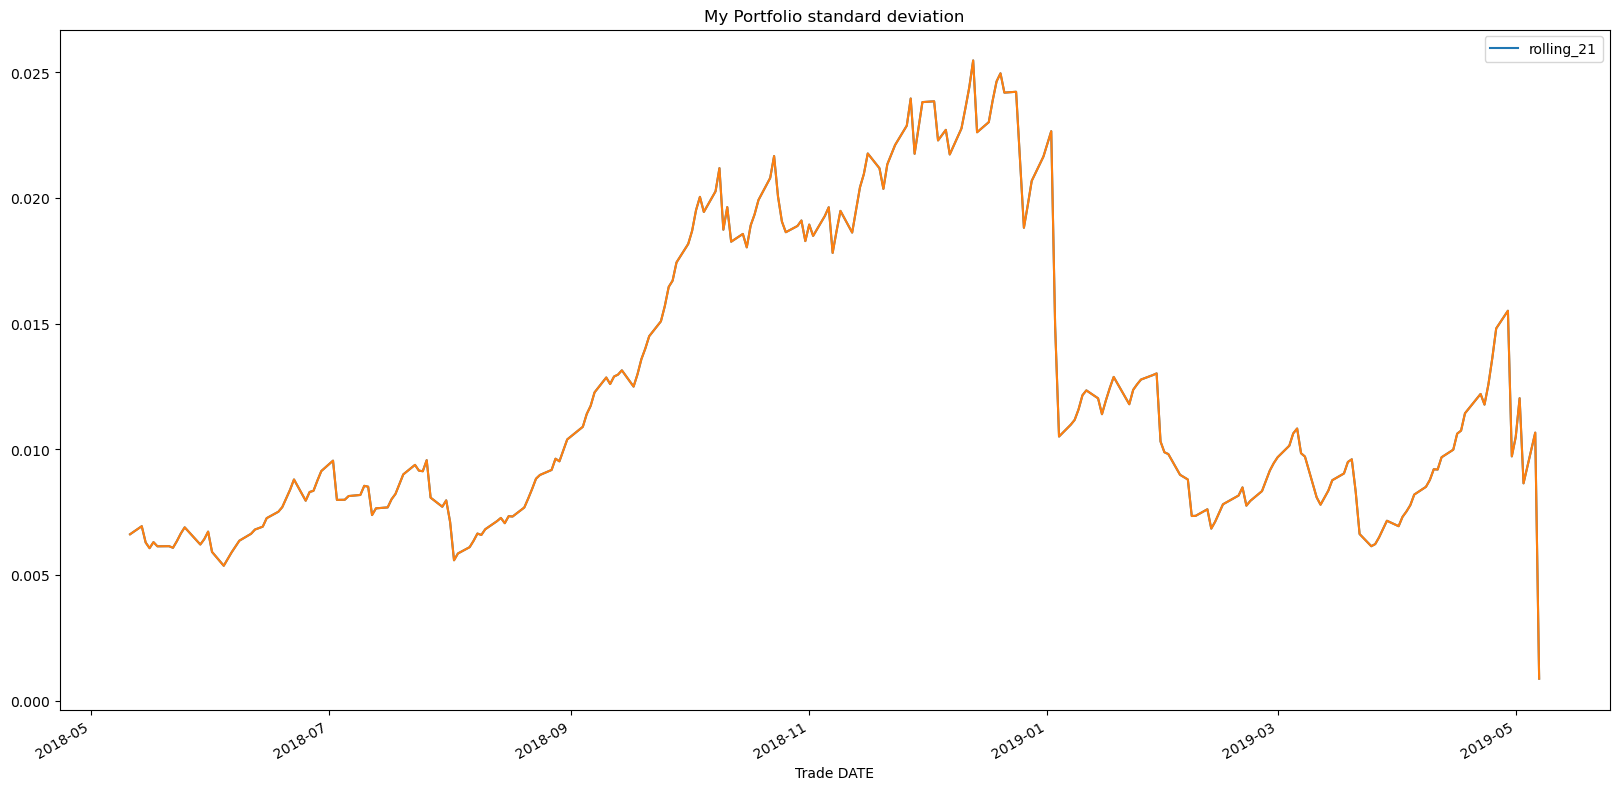

In [42]:
# Calculate rolling standard deviation
rolling_window_size = 21
ewm_all = my_portfolio_returns.ewm(span=rolling_window_size).std()
print(ewm_all)
# Plot rolling standard deviation
ax = ewm_all.plot(figsize = (20,10), title = 'My Portfolio standard deviation')
ewm_all.plot(ax = ax)
ax.legend(['rolling_21'])

### Calculate and plot the correlation

<Axes: >

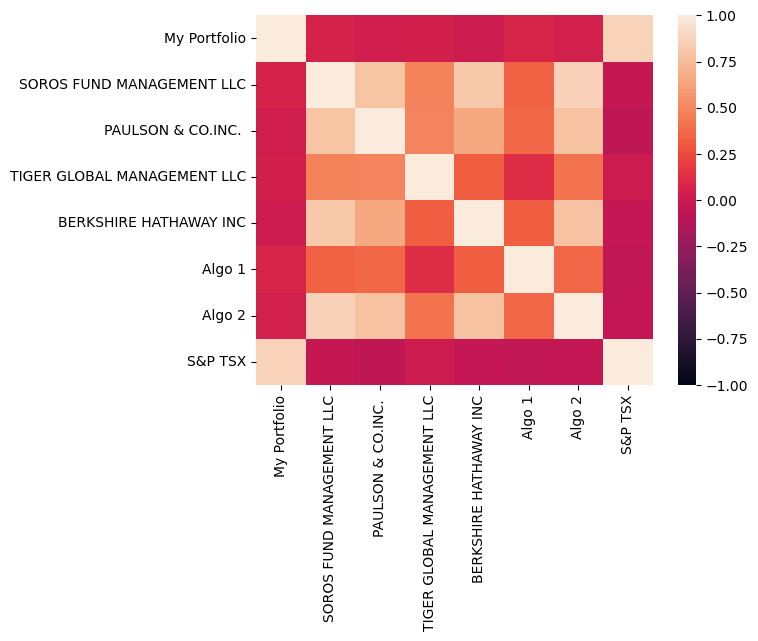

In [43]:
# Calculate and plot the correlation
my_portfolio_correlation = joined_portfolio.corr()
# Display de correlation matrix
sns.heatmap(my_portfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of my portfolio'}>

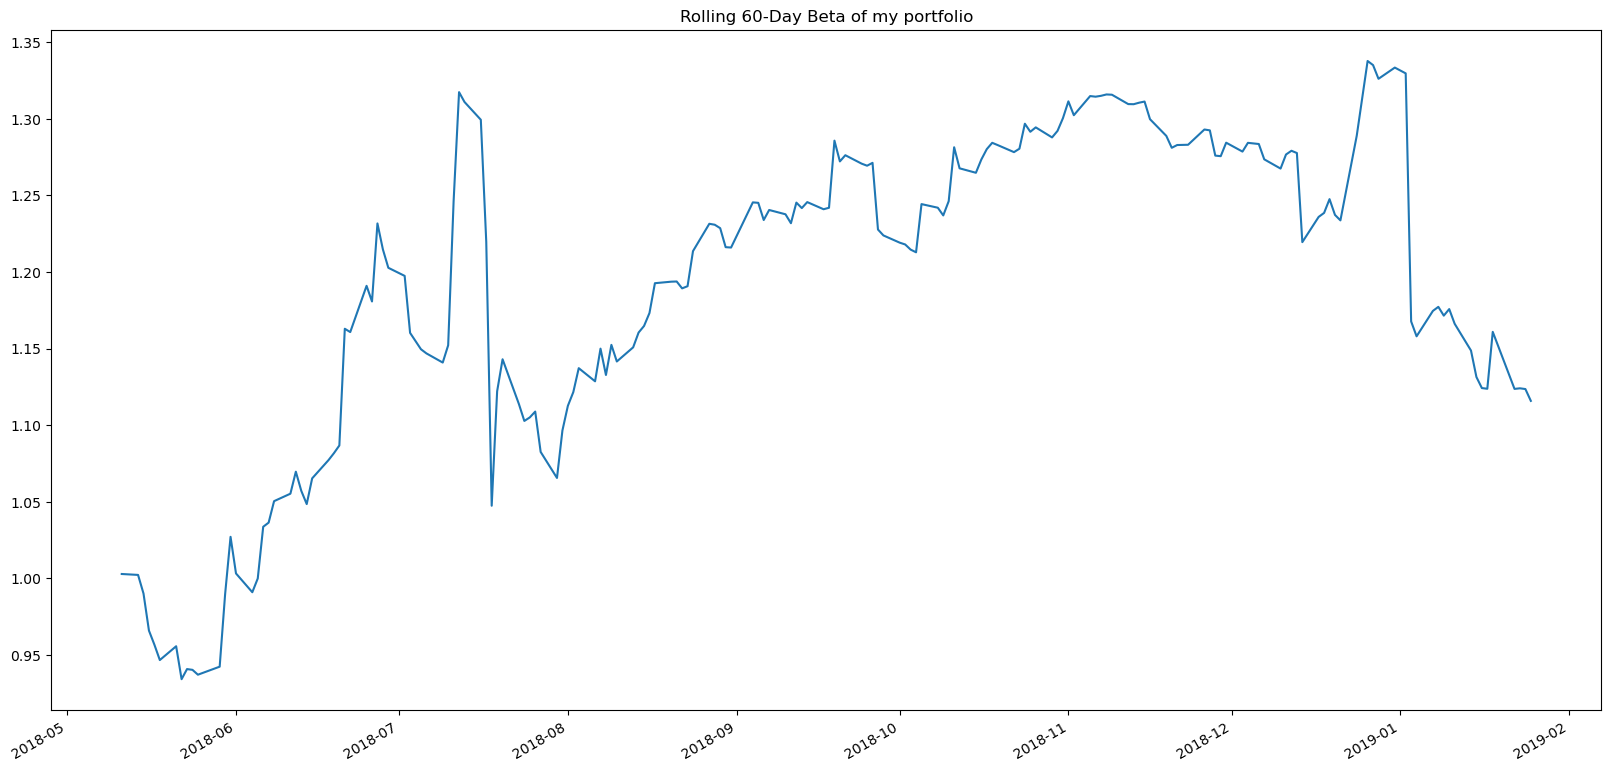

In [44]:
# Calculate and plot Beta
my_portfolio_covariance = joined_portfolio['My Portfolio'].rolling(window=60).cov(joined_portfolio['S&P TSX'])
my_portfolio_variance = joined_portfolio['S&P TSX'].rolling(window=60).var()
rolling_beta = my_portfolio_covariance / my_portfolio_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
trading_days = joined_portfolio.count()
sharpe_ratios = joined_portfolio.mean()*trading_days/(joined_portfolio.std()*np.sqrt(trading_days))

<Axes: title={'center': 'Sharpe Ratios'}>

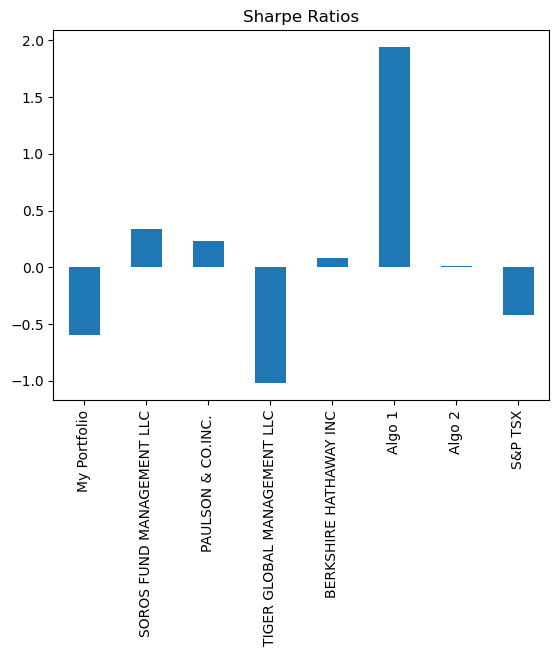

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [47]:
#With its Sharpe Ratio of -0,5, My Portfolio is better only than Tiger Global Management LLC.
#The most effective one is Algorithmical Returns Portofolio with its Algo 1 returns.
#Other portofolios have better Sharpe Ratios, therefore considered acceptable to good by investors.